 # Prediction of Seoul's bike sharing demand

 # Part1: Purpose of the Project

## Introduction

Rental bikes are gaining popularity in many city centers including Seoul, South Korea. The services provide an efficient and eco-friendly means of travel, contributing to reducing traffic congestion, lowering carbon emissions, and promoting a healthier lifestyle. As these services grow in popularity, it is essential to make sure that rental bikes are readily available and accessible to the public precisely when needed, to the success of these programs. This project focuses on predicting the demand for rental bikes in Seoul to maintain a stable supply and minimize waiting time for users.


## Basic Information about Seoulʼs Bike Sharing

Seoul Public Bike, Ttareungyi, also known as Seoul Bike, is an unmanned rental system that can be conveniently used anywhere, anytime by anyone. It was officially launched by the Seoul Metropolitan Government, to reduce road traffic in the city areas as well as greenhouse gas emissions, in December 2015, after a year of pilot operations.
There are 2600 bike stations, located mainly near subway stations and very crowded areas, and 40500 bikes are now available in 2020. Everyone over 13 years old can use it freely regardless of their nationality. The rental process goes through on the app using a QR code or entering a password. This system is mainly favored by those who live in Seoul and want to travel short distances around a few kilometers but want to avoid buses or subways that are too crowded. However, tourists from foreign countries can also use the service easily as well, just by using a credit card.

## Reasons Seoul Introduced Shared Bicycles

**Congestion Issues**

Between the 1960s and 1980s, Seoul experienced rapid economic and population growth, as well as associated urbanization and traffic congestion. The increase in income made the number of vehicles rise sharply since 1980. The increase in private car use led to harsh traffic congestion, where the average speed of roadways was only 20km/h. This also accompanied accidents and air pollution.
Despite the well-developed public transportation system in Seoul, which includes buses and subways, first-and-last-mile transfers are often covered by walking, taxis, and shared cars (known as Namun cars). Shared bicycles can widen the area for the citizens and tourists to go to places that cannot be reached by other means of transportation.

**Climate Change**

From 1980 to 2020, the annual mean temperature in Seoul increased by 2.4°C and became 13.2°C. Seoul Metropolitan Government Weather Statistics, 2021. Seoul is in a vulnerable situation where the population, facilities, and natural environment can be seriously affected by global warming, the urban environment, and the natural environment due to its characteristics as an overcrowded city as well as its high population density.

## Impact and Success

Bicycle utilization as an alternative urban transit mode has expanded dramatically since the Ttareungyi system was introduced in 2015. The following are some of the major successes:
- The Ttareungyi app saw a sharp increase in users from 34,162 in 2015 to 668,725 in 2019.
- From 3.6 million in 2016 to 13.7 million in 2021, more people rented bicycles, accounting for approximately 100 million individual trips and 275.3 million kilometers of travel.
- Because more individuals opted to ride bikes instead of drive cars, the system assisted in reducing carbon emissions by about 2,000 tons.

Using a public bike-public transit integrated transfer platform, the Seoul Metropolitan Government hopes to build on this achievement by integrating the Ttareungyi system into the larger public transportation network.


## Factors That May Influence the Number of Daily Rentals
- Weather Conditions
- Day of the week
- Seasonality
- Public events Holidays


#Import Standard Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Part 2: Data Collection

- **Seoul Bike Sharing Demand updated as of 29 Feb 2020**
    - Contains the hourly total number of public bicycles rented in the Seoul Bike Sharing System, with corresponding weather data and holiday information.
    - Total of 8,760 instances and 13 features.

Source: https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

In [ ]:
!pip3 install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

#Fetch Dataset
seoul_bike_sharing_demand = fetch_ucirepo(id=560)

#Data (as pandas dataframes)
df = seoul_bike_sharing_demand.data
df = df['features']

#Variable Information
print(seoul_bike_sharing_demand.variables)

                     name     role         type demographic description  \
0                    Date  Feature         Date        None        None   
1       Rented Bike Count  Feature      Integer        None        None   
2                    Hour  Feature      Integer        None        None   
3             Temperature  Feature   Continuous        None        None   
4                Humidity  Feature      Integer        None        None   
5              Wind speed  Feature   Continuous        None        None   
6              Visibility  Feature      Integer        None        None   
7   Dew point temperature  Feature   Continuous        None        None   
8         Solar Radiation  Feature   Continuous        None        None   
9                Rainfall  Feature      Integer        None        None   
10               Snowfall  Feature      Integer        None        None   
11                Seasons  Feature  Categorical        None        None   
12                Holiday

# Part 3: EDA (Exploratory Data Analysis)
### Basic Information of Data

In [ ]:
#Dimensions of Data
print(df.shape)

(8760, 13)


In [ ]:
#Check the first 5 rows
print(df.head())

        Date  Rented Bike Count  Hour  Temperature  Humidity  Wind speed  \
0  1/12/2017                254     0         -5.2        37         2.2   
1  1/12/2017                204     1         -5.5        38         0.8   
2  1/12/2017                173     2         -6.0        39         1.0   
3  1/12/2017                107     3         -6.2        40         0.9   
4  1/12/2017                 78     4         -6.0        36         2.3   

   Visibility  Dew point temperature  Solar Radiation  Rainfall  Snowfall  \
0        2000                  -17.6              0.0       0.0       0.0   
1        2000                  -17.6              0.0       0.0       0.0   
2        2000                  -17.7              0.0       0.0       0.0   
3        2000                  -17.6              0.0       0.0       0.0   
4        2000                  -18.6              0.0       0.0       0.0   

  Seasons     Holiday  
0  Winter  No Holiday  
1  Winter  No Holiday  
2  Winte

In [ ]:
#Check for missing values
df.isnull().sum()

Date                     0
Rented Bike Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind speed               0
Visibility               0
Dew point temperature    0
Solar Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
dtype: int64

In [ ]:
#Check for Duplicates
print(len(df[df.duplicated()==True]))

0


From the summary, we can see that there are instances where Rented Bike Count is 0. Hence, it would prove useful to find the reasons why and identify any patterns that can improve the model. There is also a high standard deviation for Rented Bike Count, which could prompt us to transform it to be normally distributed.

In [ ]:
print(df.drop(columns='Hour').describe()) #Hour column adds no value

       Rented Bike Count  Temperature     Humidity   Wind speed   Visibility  \
count        8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean          704.602055    12.882922    58.226256     1.724909  1436.825799   
std           644.997468    11.944825    20.362413     1.036300   608.298712   
min             0.000000   -17.800000     0.000000     0.000000    27.000000   
25%           191.000000     3.500000    42.000000     0.900000   940.000000   
50%           504.500000    13.700000    57.000000     1.500000  1698.000000   
75%          1065.250000    22.500000    74.000000     2.300000  2000.000000   
max          3556.000000    39.400000    98.000000     7.400000  2000.000000   

       Dew point temperature  Solar Radiation     Rainfall     Snowfall  
count            8760.000000      8760.000000  8760.000000  8760.000000  
mean                4.073813         0.569111     0.148687     0.075068  
std                13.060369         0.868746     1.12819

### Data Visualization

Based on the histogram plot of the target variable, there is quite a positive skew. This means that:
1. There could be outliers on the right-end of the scale.
2. Could be useful to transform the target variable to be normally distributed.
3. Large number of values near 0, might want to check the frequency of the 0s.

#### Distribution of Data and Outliers

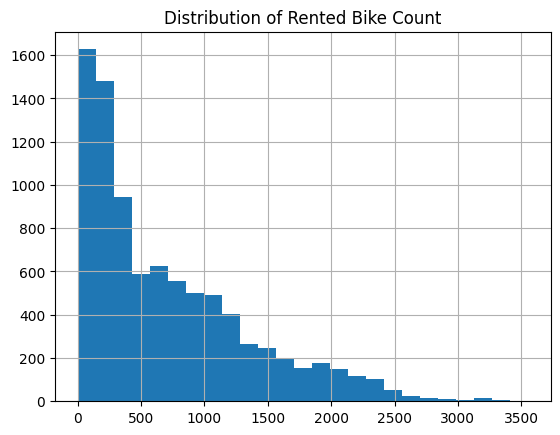

In [ ]:
#Distribution of target variable
df['Rented Bike Count'].hist(bins=25)
plt.title("Distribution of Rented Bike Count")
plt.show()

Based on the histogram plot of the independent variables:
1. Wind Speed displays a positive skew and hence a log-transform could be useful.
2. Most data points have High Visibility or Low Solar Radiation/ Rainfall/ Snowfall. Will need to dive deeper into whether these variables contribute to the effectiveness of the model.

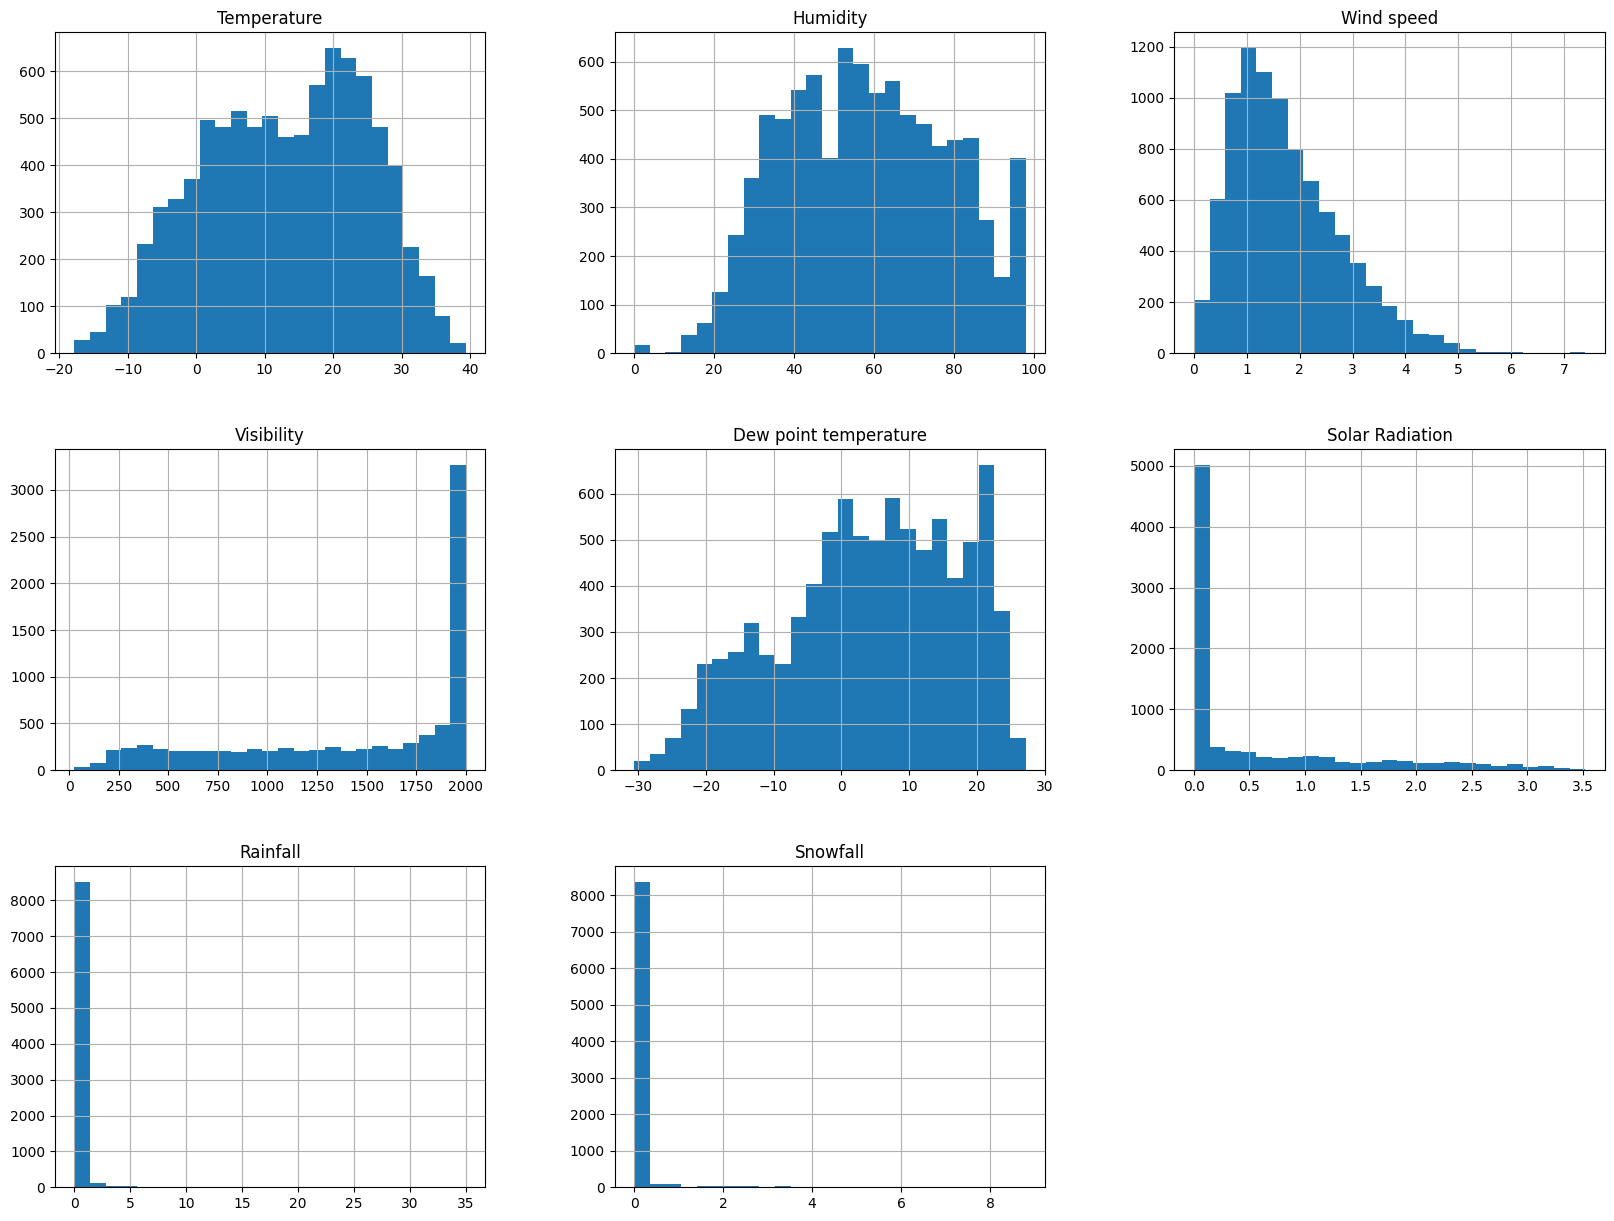

In [ ]:
#Check Distribution of Independent Variables
distribution_df = df.drop(columns=['Date', 'Rented Bike Count', 'Hour'])
distribution_df.hist(bins=25, figsize=(20,15))
plt.show()

Based on the histogram plot, we can tell the following:
1. The distribution is rather centered for Temperature and Humidity, but displays a positive skew for Wind Speed and a negative skew for Dew Point Temperature.
2. Spikes in frequency for Visibility, Solar Radiation, Rainfall and Snowfall.

However, the spikes does not make sense. Why would high Visibility, low Solar Radiation, low Rainfall and No Snowfall lead to a Rental Bike Count of 0? **It could be better to exclude these data points to get a better model.**

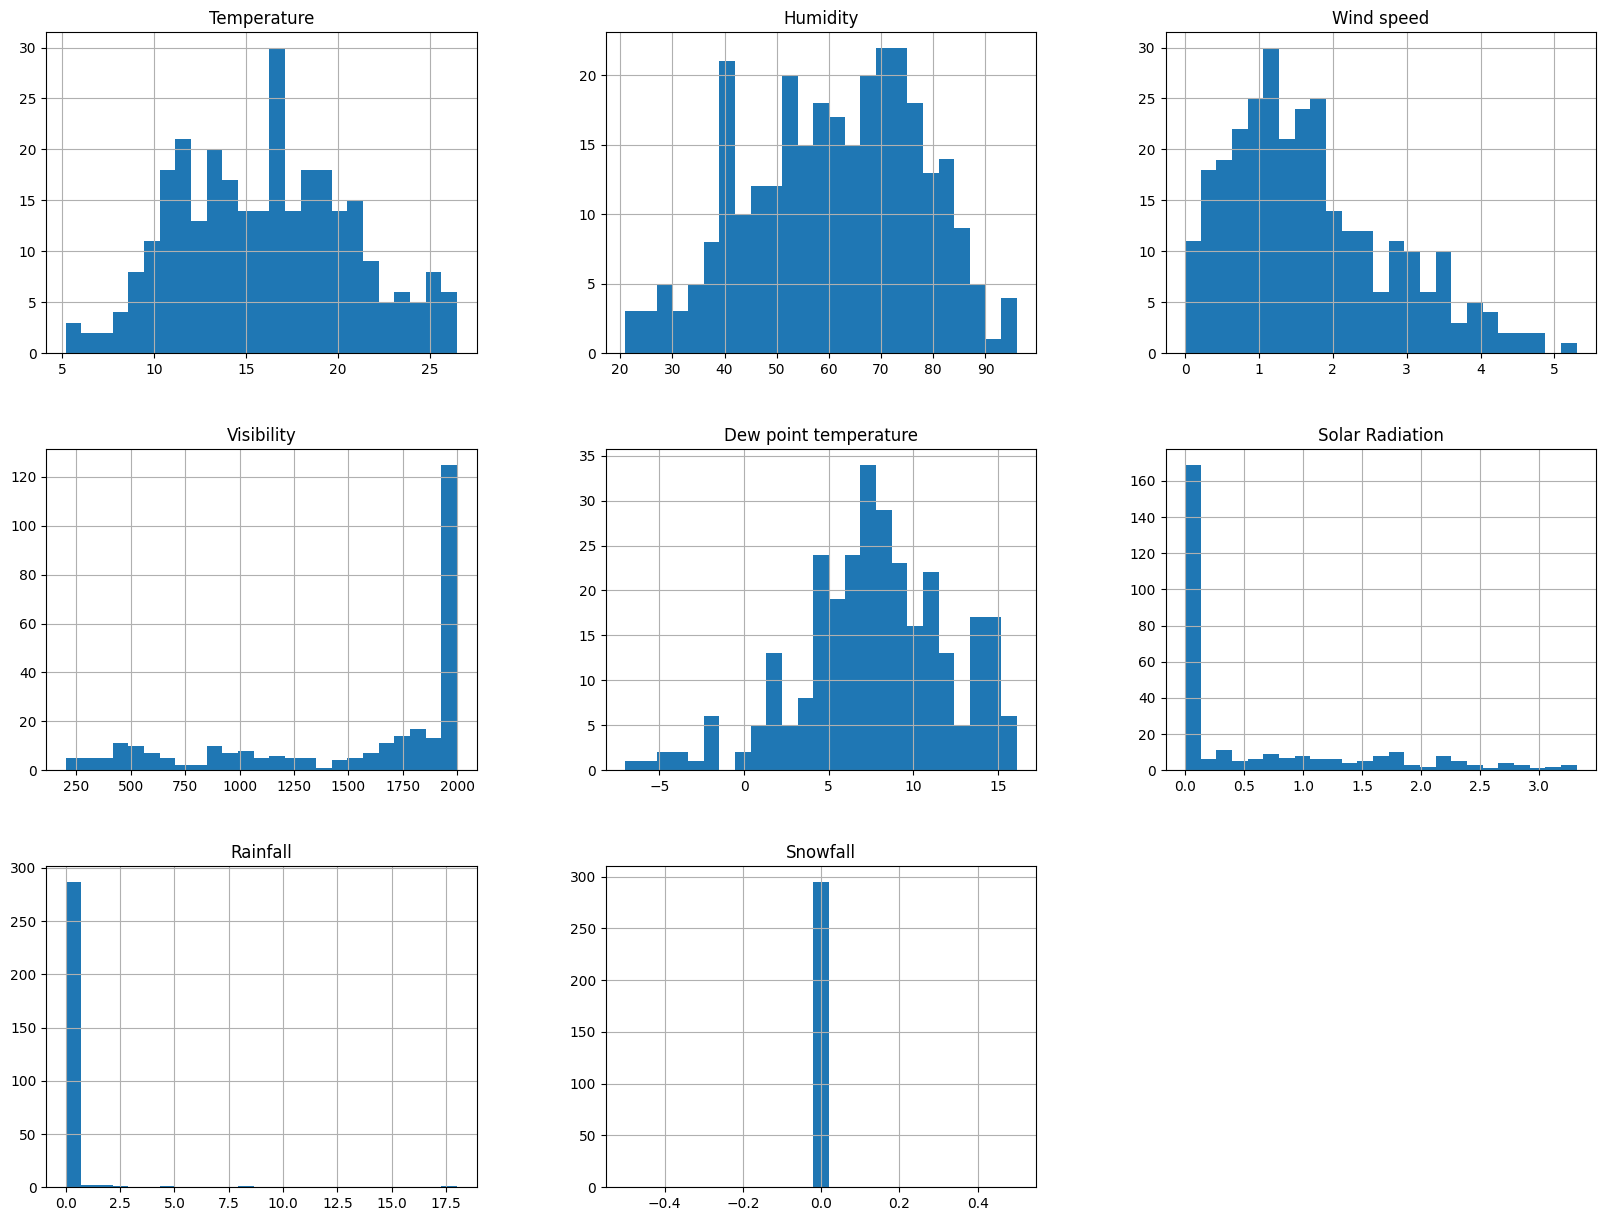

In [ ]:
#Find out if Rental Bike Count == 0 has a strict pattern
zero_rental_df = df[df['Rented Bike Count']==0].drop(columns=['Date', 'Rented Bike Count', 'Hour'])
zero_rental_df.hist(bins=25, figsize=(20,15))
plt.show()

Based on the box plot, we can see numerous outliers as represented by circles for each Season. However, these outliers are consistent for all four seasons as shown by the tight clusters. Hence, it would be better to keep those data points in as they provide valuable insights to improve the robustness of the model.

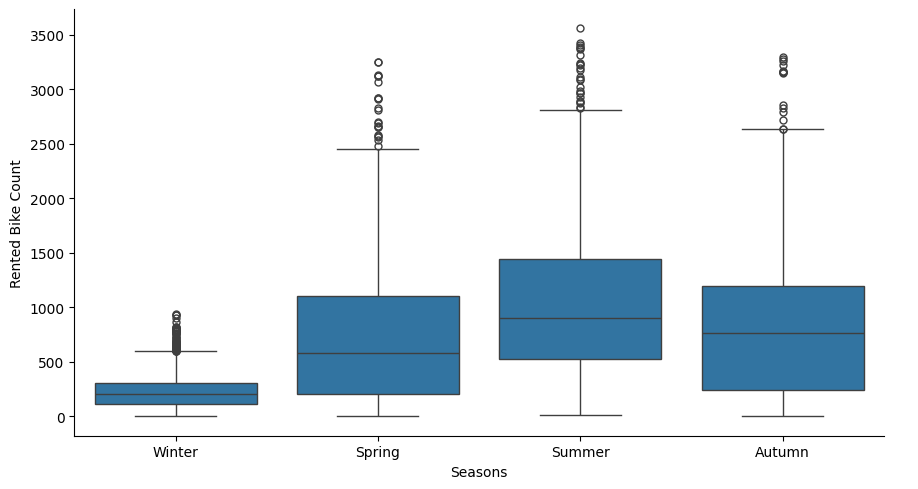

In [ ]:
sns.catplot(x='Seasons', y='Rented Bike Count', kind='box',data=df)
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

#### Encoding Categorical Variables

In [ ]:
#Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#Enumerate Holiday
#No Holiday = 1, Holiday = 0
label_encoder = LabelEncoder()
df.iloc[:, -1] = label_encoder.fit_transform(df.iloc[:, -1])

#Split Seasons into different columns and make it binomial
hot_encoder = OneHotEncoder()
encoded_column = hot_encoder.fit_transform(df[['Seasons']]).toarray()
encoded_column = pd.DataFrame(encoded_column, columns=hot_encoder.get_feature_names_out(['Seasons']))
df = pd.concat([df,encoded_column], axis=1).drop(columns='Seasons')
df.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0


#### Correlation Plots

Based on the heatmap, we find that:
1. There are little variables that have a strong correlation to the Rented Bike Count. We could use this information to do feature selection.
2. However, we should still consider using the Weather Information as correlation does not necessarily mean causation.
3. Of note, the only Season that seems to have an impact is Winter.
4. Additionally, there is no need to include both Temperature and Dew Point Temperature.

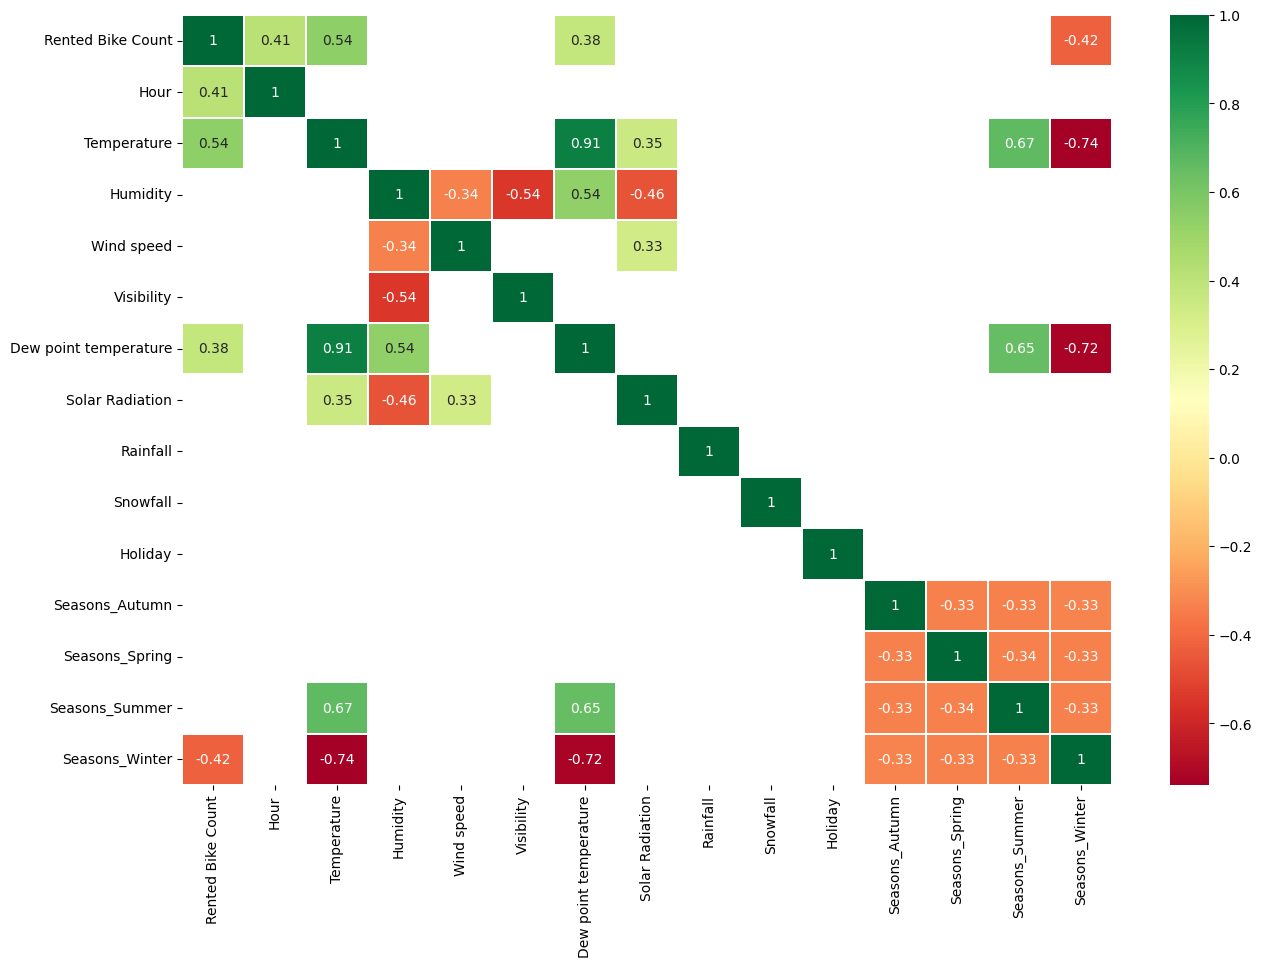

In [ ]:
#Correlation Matrix
corr_matrix = df.drop(columns='Date').corr()

# Plot heatmap
def plot_heatmap(corr_matrix):
  corr_matrix[corr_matrix.abs() < 0.3] = np.nan
  sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', linewidths=0.2)
  fig = plt.gcf()
  fig.set_size_inches(15, 10)
  plt.show()

plot_heatmap(corr_matrix)

After applying log transformation and filtering the dataset, based on the heatmap, we find that the correlation between the target variable and features got stronger overall. Of note, the correlation between Solar Radiation and the target variable has increased greatly.


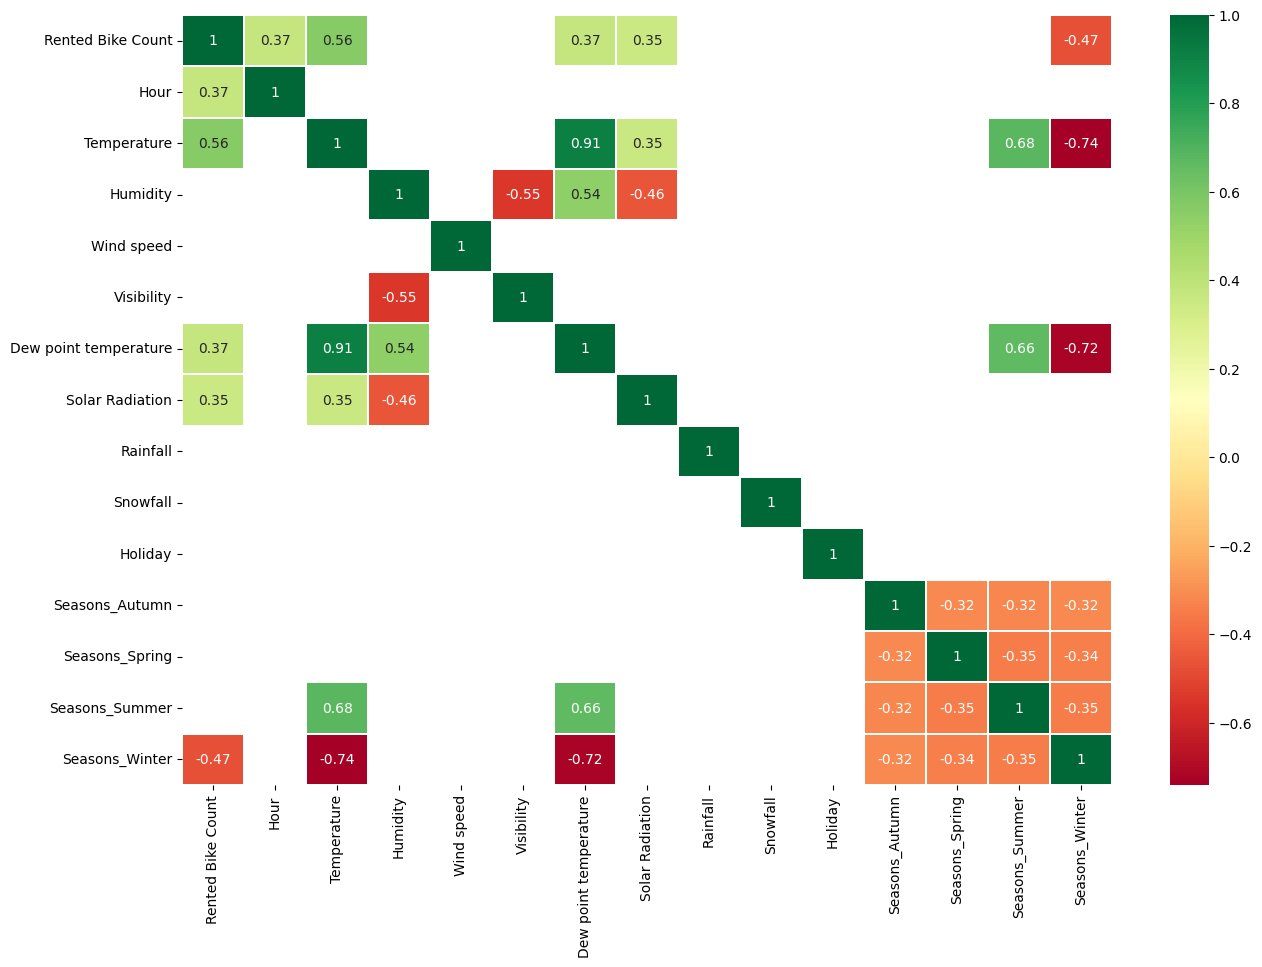

In [ ]:
#Remove data points where Rented Bike Count == 0
df = df.loc[df['Rented Bike Count'] != 0].copy()

#Log Transform Target Variable and Wind Speed
df['Rented Bike Count'] = np.log(df['Rented Bike Count'])
df['Wind speed'] = np.log(df['Wind speed'] + 1e-9) #Adding a small value to avoid log(0)

#Heatmap
corr_matrix = df.drop(columns='Date').corr()
plot_heatmap(corr_matrix)

Based on the scatterplots, it seems that the only features that show a linear relationship to the target variable would be: Temperature or Dew Point Temperature.

This means that those two features are likely to be key components to an accurate model. However, as previously mentioned, they do overlap, so only one would be required.

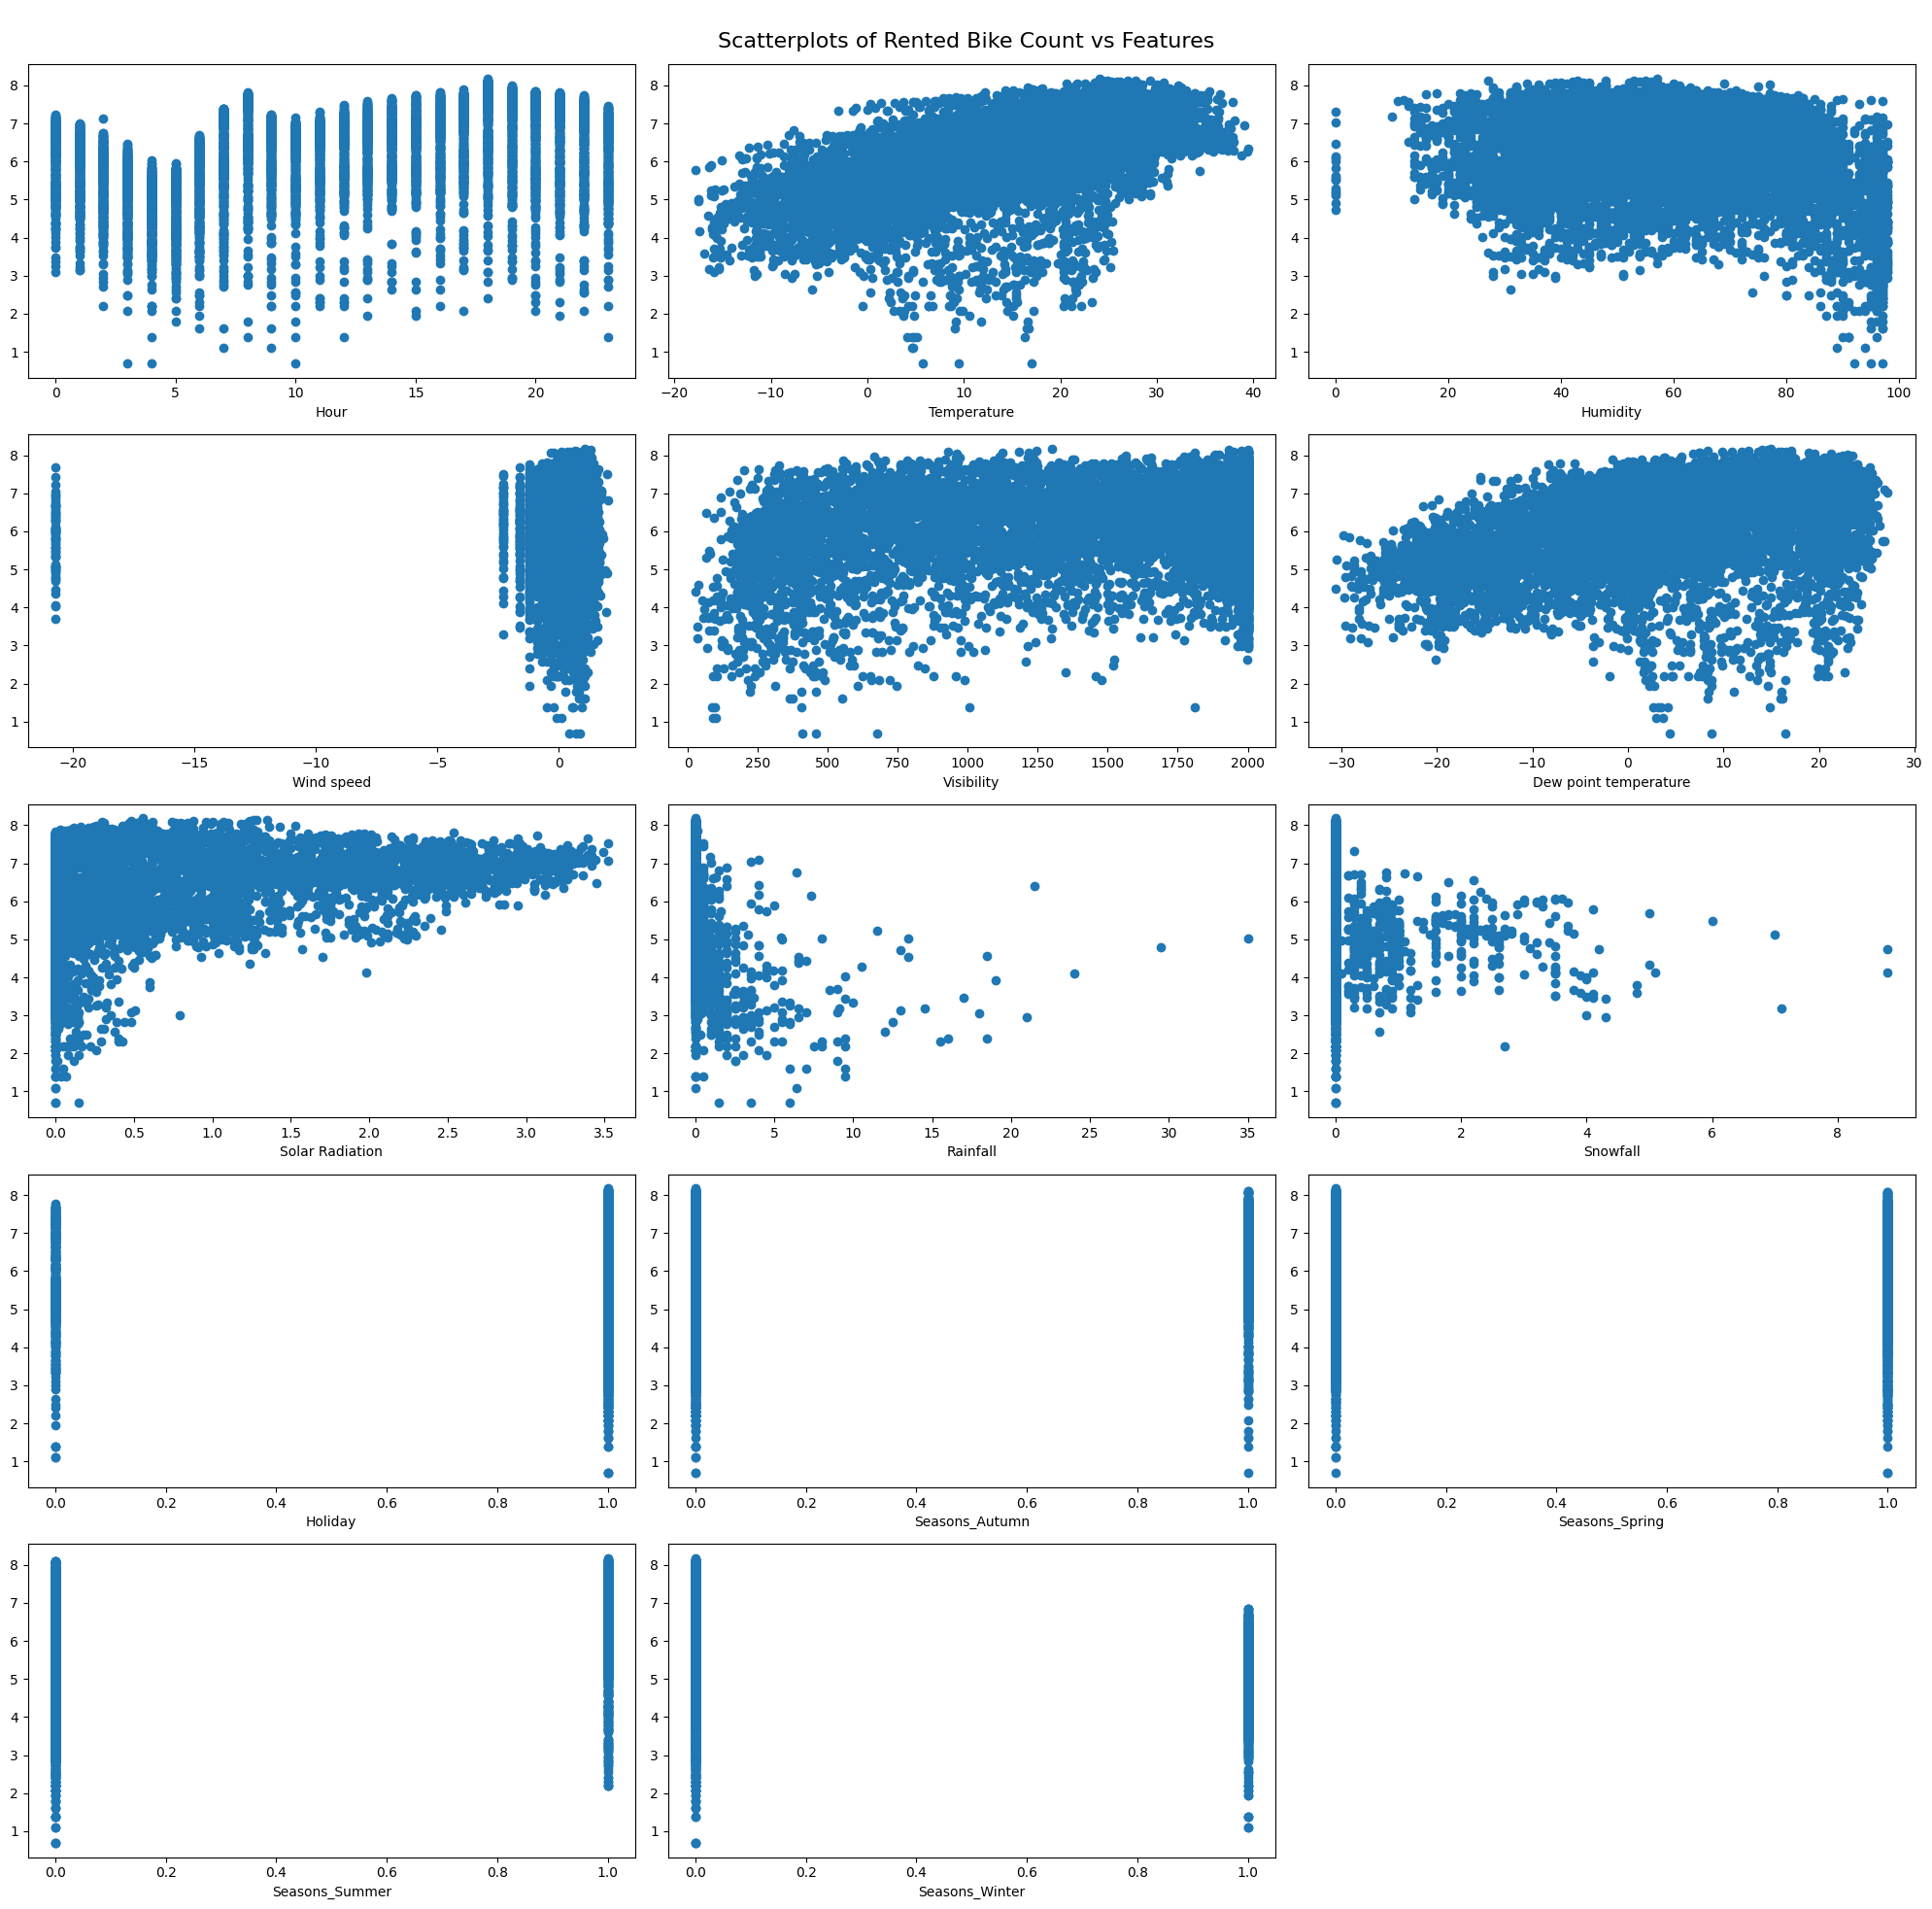

In [ ]:
#Initiate Blank Canvas
plot_nrows = 5
plot_ncols = int((len(df.columns)-1)/plot_nrows) #Removed Date (-1)
fig, axs = plt.subplots(nrows=plot_nrows, ncols=plot_ncols, figsize=(20,20))

#Preparing Dataset
target_variable = df['Rented Bike Count']
features = df.iloc[:, 2:].copy()

# Plotting scatterplots
for i, feature in enumerate(features.columns):
    row = i // plot_ncols #Floor Division
    col = i % plot_ncols #Remainder
    axs[row, col].scatter(features[feature], target_variable)
    axs[row, col].set_xlabel(feature)

# Display the plot
fig.delaxes(axs[4, 2])
fig.suptitle('\nScatterplots of Rented Bike Count vs Features\n', fontsize=16)
plt.tight_layout()
plt.show()

# Part 4: Predicting the Rented Bike Count using the other variables

### Data Preparation

In [ ]:
#Encoding has already been done

#Drop Unnecessary Column
df = df.drop(columns = 'Dew point temperature')

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Day of Week'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
#Drop the original 'Date' column
df.drop('Date', axis=1, inplace=True)

#Rearrange Columns
wind_speed = df.pop('Wind speed')
df.insert(1, 'Wind speed', wind_speed)
df.head()

,Rented Bike Count,Wind speed,Hour,Temperature,Humidity,Visibility,Solar Radiation,Rainfall,Snowfall,Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Day of Week,Month
0,5.537334,7.884574e-01,0,-5.2,37,2000,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,4,12
1,5.318120,-2.231436e-01,1,-5.5,38,2000,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,4,12
2,5.153292,1.000000e-09,2,-6.0,39,2000,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,4,12
3,4.672829,-1.053605e-01,3,-6.2,40,2000,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,4,12
4,4.356709,8.329091e-01,4,-6.0,36,2000,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,4,12


In [ ]:
#Splitting Dataset
from sklearn.model_selection import train_test_split
x = df.iloc[:, 1:]
y = df.iloc[:, 0]
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.30, random_state=101)


#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train.iloc[:, 2:8] = scaler.fit_transform(X_train.iloc[:, 2:8]) #Omit Categorical Variables and Wind Speed
X_test.iloc[:, 2:8] = scaler.transform(X_test.iloc[:, 2:8])

### Baseline Model: Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
base_model=LinearRegression().fit(X_train, Y_train)
y_basepredict = base_model.predict(X_test)

Next, we inspect the model.

In [ ]:
#Intercept
print(base_model.intercept_)

5.200178034147459


In [ ]:
#Coefficients
coeff_df=pd.DataFrame(base_model.coef_, X_train.columns, columns=['Coefficient'])
print(coeff_df)

                 Coefficient
Wind speed         -0.002114
Hour                0.041890
Temperature         0.516000
Humidity           -0.379580
Visibility         -0.019838
Solar Radiation    -0.043475
Rainfall           -0.261354
Snowfall           -0.020920
Holiday             0.365255
Seasons_Autumn      0.290069
Seasons_Spring      0.059765
Seasons_Summer      0.082754
Seasons_Winter     -0.432588
Day of Week        -0.023584
Month               0.021430


In [ ]:
#Accuracy Calculations
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Calculate R-squared
base_r2 = r2_score(Y_test, y_basepredict)

# Calculate RMSE
base_rmse = np.sqrt(mean_squared_error(Y_test, y_basepredict))

# Print R-squared and RMSE
print('R-squared: {:.3f}'.format(base_r2))
print('RMSE: {:.3f}'.format(base_rmse))

R-squared: 0.599
RMSE: 0.735


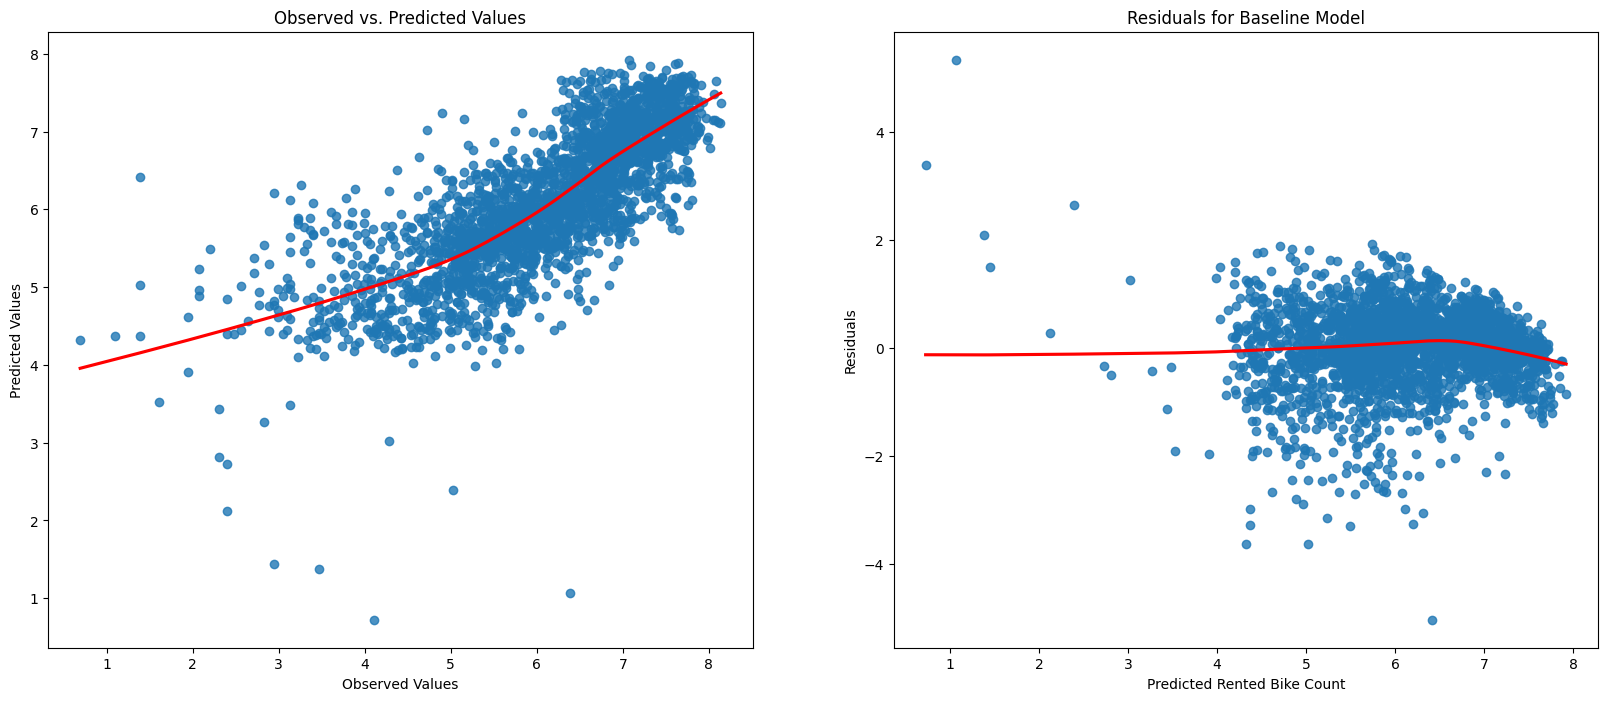

In [ ]:
#Initiate Blank Canvas
fig, axs = plt.subplots(ncols=2, figsize=(20,8))

# Create a scatter plot of observed vs. predicted values for both test data
sns.regplot(x=Y_test, y=y_basepredict, lowess=True, line_kws={'color':'red'}, ax=axs[0])
axs[0].set_xlabel('Observed Values')
axs[0].set_ylabel('Predicted Values')
axs[0].set_title('Observed vs. Predicted Values')

# Create a scatter plot of Residuals for test data
residuals=(Y_test-y_basepredict)
sns.regplot(x=y_basepredict, y=residuals, lowess=True, line_kws={'color':'red'}, ax=axs[1])
axs[1].set_xlabel('Predicted Rented Bike Count')
axs[1].set_ylabel('Residuals')
axs[1].set_title('Residuals for Baseline Model')

# Display the plot
plt.show()

Next, we will do a lasso regression to optimize the model.


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

#Crease Lasso model
lasso=Lasso(random_state=1)
pipeline=Pipeline([('scaler', scaler), ('lasso', lasso)])
param_grid={'lasso__alpha': np.logspace(-5, 5, 100)}
grid=GridSearchCV(pipeline, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
grid.fit(X_train, Y_train)


NameError: name 'scaler' is not defined

In [ ]:
#show optimized alpha value
best_alpha=grid.best_params_['lasso__alpha']
print(best_alpha)

0.005336699231206307


In [ ]:
alphas=np.logspace(-5, 5, 100)
coefs=[]
for alpha in alphas:
  lasso=Lasso(alpha=alpha, random_state=1)
  pipeline=Pipeline([('scaler', scaler), ('lasso', lasso)])
  pipeline.fit(X_train, Y_train)
  coefs.append(pipeline.named_steps['lasso'].coef_)

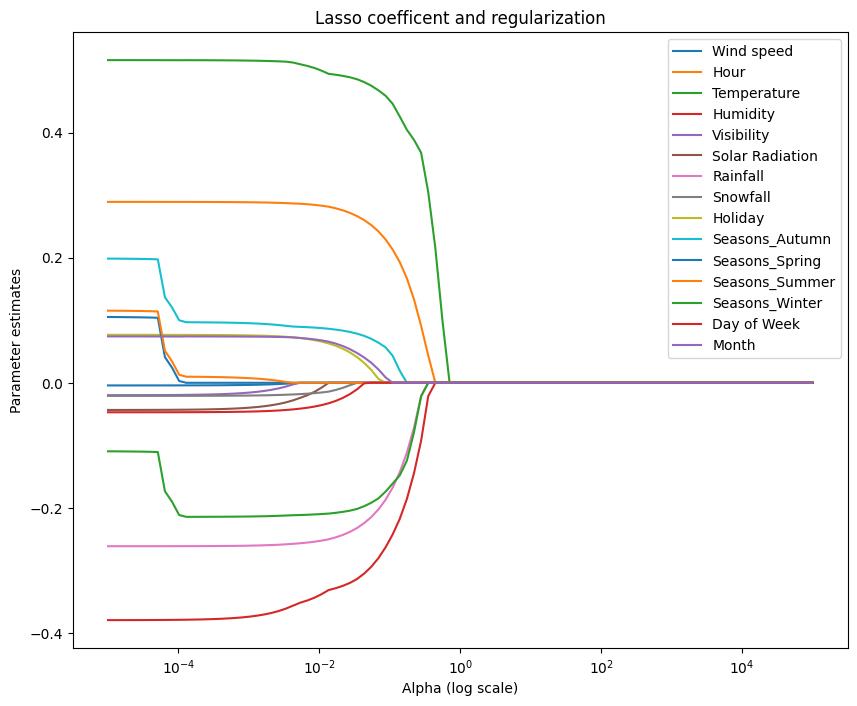

In [ ]:
plt.figure(figsize=(10, 8))
ax=plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Parameter estimates')
plt.title('Lasso coefficent and regularization')
plt.legend(df.drop(['Rented Bike Count'], axis=1), loc='upper right')

This LASSO regression shows that the most important features are temperature, hour, humidity, rainfall, and winter. Moderately important are autumn and holiday.

In [ ]:
mse=[]

for alpha in alphas:
    lasso = Lasso(alpha=alpha, random_state=1)
    pipeline = Pipeline([('scaler', scaler), ('lasso', lasso)])
    pipeline.fit(X_train, Y_train)
    Y_pred = pipeline.predict(X_test)
    mse.append(mean_squared_error(Y_test, Y_pred))

Next, we will see how well the optimized model performs

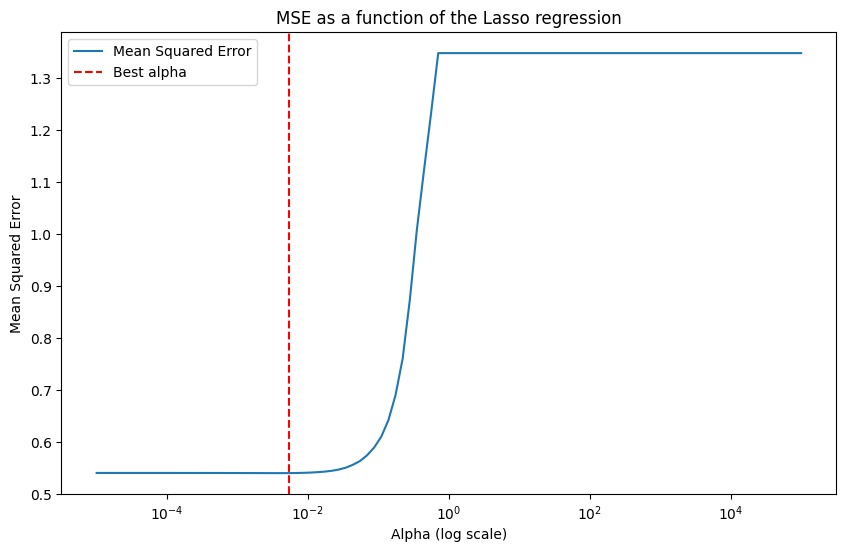

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(alphas, mse, label='Mean Squared Error')
#add line representing best alpha value
plt.axvline(x=best_alpha, color='red', linestyle='--', label='Best alpha')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Mean Squared Error')
plt.title('MSE as a function of the Lasso regression')
plt.legend()
plt.show();

In [ ]:
Y_train_pred = grid.predict(X_train)
Y_test_pred = grid.predict(X_test)
train_rmse = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
test_rmse = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
train_r2 = r2_score(Y_train, Y_train_pred)
test_r2 = r2_score(Y_test, Y_test_pred)

# Print the performance metrics
print(f'Training RMSE: {train_rmse:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')
print(f'Training R^2: {train_r2:.2f}')
print(f'Test R^2: {test_r2:.2f}')

Training RMSE: 0.73
Test RMSE: 0.73
Training R^2: 0.61
Test R^2: 0.60


In [ ]:
# Check the regression coefficients
lasso_coef = grid.best_estimator_.named_steps['lasso'].coef_
print(lasso_coef)

[-0.          0.28632201  0.50941287 -0.35168861 -0.         -0.02414258
 -0.25660139 -0.01809163  0.07158478  0.08940225 -0.          0.
 -0.2114531  -0.04135185  0.07166235]


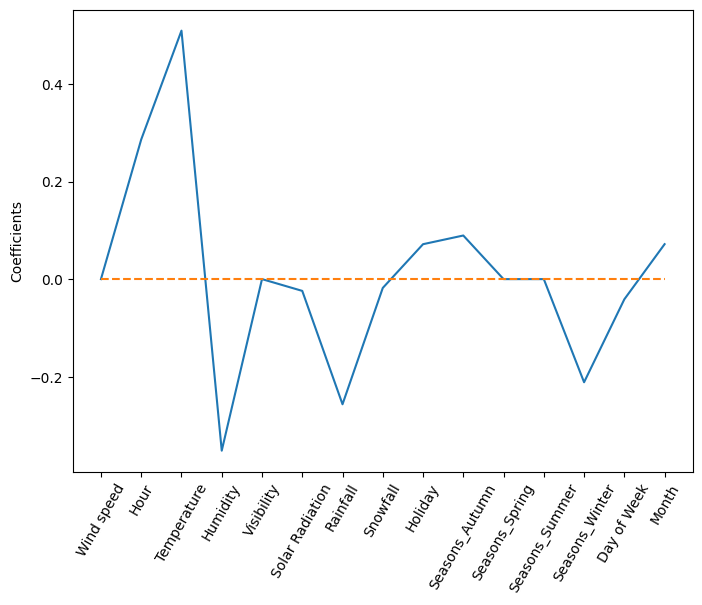

In [ ]:
# Visualize the coefficients
plt.figure(figsize=(8, 6))

df_len = len(df.drop(columns='Rented Bike Count').columns)
df_len_range = range(df_len)
plt.plot(df_len_range, lasso_coef)
# add y=0 line
plt.plot(df_len_range, [0]*df_len, '--')
plt.xticks(df_len_range, df.drop(columns='Rented Bike Count').columns.values, rotation=60)
plt.ylabel('Coefficients')
plt.show();

This shows that the most important features are temperature, hour, humidity, rainfall, and whether it's winter. This makes sense as varibales people would consider when deciding whether to rent a bike.

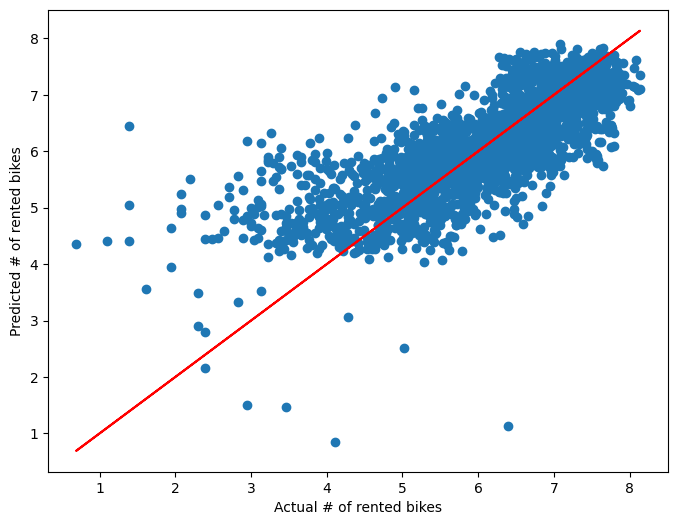

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_test_pred)
plt.plot(Y_test, Y_test, color = 'red')
plt.xlabel('Actual # of rented bikes')
plt.ylabel('Predicted # of rented bikes')
plt.show();

We can see from this visualization that the model is better at predicting days when there will be high numbers of rentals, but that it overpredicts on days with low numbers of rentals.

##The Original Problem

The aim of our study was to predict the demand for rental bikes in Seoul, as this is crucial for maintaining a stable supply, minimizing waiting times for users, and ensuring the success of the bike-sharing program in promoting eco-friendly urban transportation.Accurate demand predictions allow for better resource allocation, enhancing user satisfaction and contributing to the overall effectiveness of the bike-sharing system.
##Main Findings



*   **Seasonal Influence:**


Bike rentals showed a strong seasonal pattern.
Higher rentals were observed in spring and summer, while winter months saw a decline in rentals. This indicates a preference for biking during warmer weather.



*   **Weather Conditions:**



**Temperature:** There is a positive correlation between temperature and bike rentals . Warmer temperatures are associated with higher rental counts.

**Humidity:**Humidity shows a significant correlation with bike rentals . Moderate humidity levels appear to favor bike usage.

**Wind Speed:**A weak negative correlation was observed between wind speed and bike rentals . Higher wind speeds slightly reduce bike rentals.

**Visibility:**Higher visibility is positively correlated with bike rentals, although the correlation is not very strong .

Temperature, humidity, rainfall, and hour were strong predictors of bike rental demand.



*   **Holiday Impact:**


Holidays generally showed lower bike rental counts.
Bike rentals tend to decrease on holidays, possibly due to fewer people commuting to work or school.


##Potential Shortcomings of the Analysis



**Data Imbalance:** Instances with zero bike rentals could introduce bias, impacting model performance.

**Feature Engineering:** Limited feature engineering may have restricted the model's ability to capture complex patterns.

**Model Simplicity:**Using a simple Linear Regression model may not fully capture non-linear relationships in the data.

##Limitations
**Temporal Scope:**The dataset only covers up to February 2020, potentially missing significant long-term trends.

**External Factors:** Excludes factors like urban infrastructure changes, economic conditions, and public health events (ex. COVID-19).

**Data Granularity:** Hourly aggregation might overlook finer temporal patterns such as rush hour effects.


##Areas for Future Research
**Advanced Modeling Techniques:** Implement more sophisticated models like Random Forest, XGBoost, or Neural Networks to improve prediction accuracy.

**Extended Temporal Analysis:** Include more recent data to observe long-term trends and seasonal variations.

**Impact of Policy Changes:** Analyze the effects of urban policies on bike-sharing demand, such as new bike lanes or subsidies.

**User Behavior Studies:** Incorporate user demographics and behavior patterns to provide personalized insights and recommendations.

